In [65]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from datetime import datetime
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
import os
consumer_key = os.getenv("twitter_consumer_key")
consumer_secret = os.getenv("twitter_consumer_secret")
access_token = os.getenv("twitter_access_token_key")
access_token_secret = os.getenv("twitter_access_token_secret")

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [66]:
# Target Search Term
target_term = ("BBC", "CBS", "CNN", "Fox", "nytimes")

# Variables for holding sentiments
sentiments = []


#Loop Through each term
for user in target_term:
    compound_list = []
    counter = 1
    
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline("@" + user, page=x)


        # Loop through all tweets 
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            sentiments.append({"User": user, 
                               "Date": tweet["created_at"],
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
            counter = counter + 1

In [67]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv("Distinguishing_Sentiments.csv")
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,0.0000,Fri Mar 23 19:07:00 +0000 2018,1.000,0.000,0.000,"RT @BBCOne: .@GaryLineker, @OreOduba, @ThisisD...",1,BBC
1,-0.2960,Fri Mar 23 18:03:04 +0000 2018,0.864,0.136,0.000,From @taylorswift13 to @Beyonce: these are the...,2,BBC
2,0.0000,Fri Mar 23 17:33:03 +0000 2018,1.000,0.000,0.000,"Tonight, @GaryLineker, @ThisisDavina and @OreO...",3,BBC
3,0.0000,Fri Mar 23 17:02:01 +0000 2018,1.000,0.000,0.000,"Your week, as told by @louistheroux. 📆😂\nhttps...",4,BBC
4,0.0000,Fri Mar 23 16:27:45 +0000 2018,1.000,0.000,0.000,RT @BBCWales: A #DanceForParkinsons session wi...,5,BBC
5,0.7783,Fri Mar 23 16:00:12 +0000 2018,0.714,0.000,0.286,"Meet Australian maths teacher Eddie Woo, who h...",6,BBC
6,-0.4479,Fri Mar 23 14:33:40 +0000 2018,0.828,0.172,0.000,"RT @BBCOne: No @andy_murray, this is not a dre...",7,BBC
7,0.5994,Fri Mar 23 14:03:08 +0000 2018,0.813,0.000,0.187,These beautiful photographs reveal how refugee...,8,BBC
8,-0.4767,Fri Mar 23 14:00:02 +0000 2018,0.871,0.129,0.000,How would you react if you woke up and found M...,9,BBC
9,0.6114,Fri Mar 23 13:33:04 +0000 2018,0.800,0.000,0.200,Spring is here! 🌱🌸🥦 Make the most of seasonal ...,10,BBC


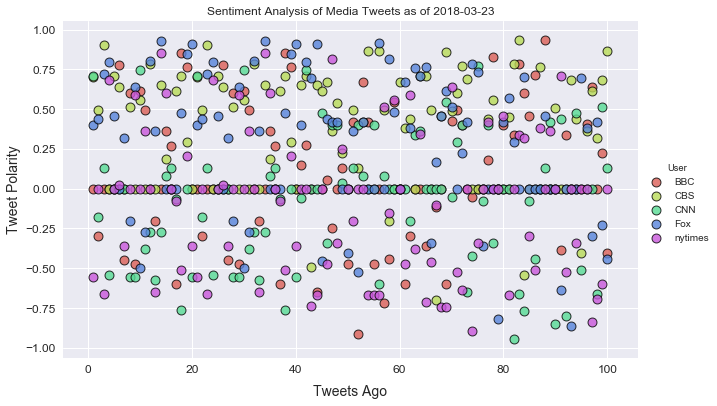

In [68]:
# Set style of scatterplot
sns.set_style("ticks")
plt.style.use("seaborn")


# Create scatterplot using Seaborn
sns.lmplot(x ="Tweets Ago", 
           y ="Compound",
           hue="User",
           data=sentiments_pd, 
           fit_reg=False,
           palette =sns.color_palette("hls", 5) ,
           size = 6,
           aspect = 1.5,
           scatter_kws={"marker": "D",
                        "s": 80,
                      "edgecolor":sns.xkcd_rgb["black"],
                      "linewidth": 1})

# Set title, x and y labels, sizing, and formatting of chart
curDate = datetime.now().date()
plt.title(f"Sentiment Analysis of Media Tweets as of {curDate}")
plt.xlabel("Tweets Ago", labelpad=10, fontsize = 14)
plt.ylabel("Tweet Polarity",fontsize = 14)
plt.subplots_adjust(top=0.88)
plt.xticks(size = 12)
plt.yticks(size = 12)

# Save Image
plt.savefig("Sentiment_Analysis_ScatterPlot.png")

plt.show()


In [69]:
new_df = pd.DataFrame(sentiments_pd.groupby("User")["Compound"].mean())
new_df

,Compound
User,
BBC,0.094948
CBS,0.365024
CNN,-0.059616
Fox,0.270882
nytimes,-0.081115


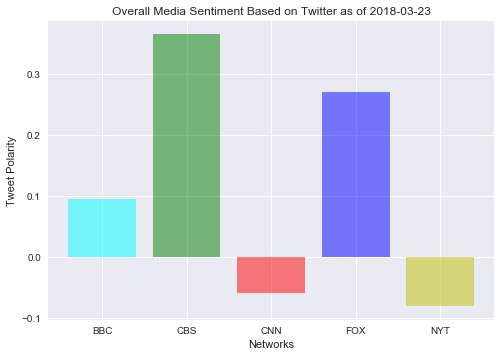

In [75]:
x_axis = np.arange(len(new_df["Compound"]))
compound_score = new_df["Compound"]
tick_locations = [value+0.4 for value in x_axis]
curDate = datetime.now().date()
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment Based on Twitter as of {curDate}")
sns.set()
plt.savefig("BarSentiment.png")
plt.show()